##  Numpy

In [12]:
import numpy as np

**(1)** Реализуйте функцию, принимающую на вход матрицу X и два массива i и j одинаковой длины и возвращающую вектор np.array, состоящий из последовательности элементов [X[i[0], j[0]], X[i[1], j[1]], ..., X[i[N-1], j[N-1]]].


Кажется numpy может это сделать просто через индексацию матрицы:

In [4]:
def construct_array(X, i, j):
    return X[i, j]

Проверим это на каком-нибудь примере:

In [27]:
X = np.array([[1, 2, 3],
              [4, 5, 6]])
i = np.array([0, 0, 1])
j = np.array([0, 1, 1])

construct_array(X, i , j)

array([1, 2, 5])

И мы действительно получили нужную выборку чисел матрицы.

**(2)** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы. Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответом является 3. Если ненулевых элементов нет, функция должна возвращать None.


Теперь придётся найти пару методов, которые помогут нам посчитать произведение. Я воспользовался *take, nonzero, diag, count_nonzero* и *prod*, правда думаю, можно было обойтись и меньшим количеством дейтсвий :)

In [23]:
def nonzero_product(X):
    diag = X.diagonal()
    if np.count_nonzero(diag) == 0:
        return None
    return diag.take(diag.nonzero()).prod()

Проверим на примере из задания и на случае с нулевой диагональю:

In [28]:
X = np.array([[1, 0, 1], 
               [2, 0, 2], 
               [3, 0, 3], 
               [4, 4, 4]])

nonzero_product(X)

3

In [32]:
Y = np.array([[0, 1],
              [1, 0]])

nonzero_product(Y)

Видно, что на обоих тестах функция дала нужный ответ.

**(3)** Написать функцию, возвращающую максимальный элемент в массиве *x* среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если подходящих элементов нет, функция должна возвращать *None*.

Для этого можно сначала найти те элементы, перед которыми стоит 0, поместить их в отдельный массив и найти максимум в нём. Проделаем это, не забывая, что таких элементов могло и не быть:

In [5]:
def max_element(arr):
    cond = arr[:-1] == 0
    arr = arr[1:]
    if cond.any() == False:
        return None
    return np.amax(arr[cond])

Проверим на тесте из условия:

In [33]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])

max_element(x)

5

А теперь на случае, где нет подходящих элементов вовсе:

In [36]:
x = np.array([1, 2, 3])

max_element(x)

Легко заметить, что мы получили нужный результат.

**(4)** Реализуйте функцию, принимающую на вход матрицу *X* и некоторое число *v* и возвращающую ближайший к заданному числу элемент матрицы. Например, для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

Здесь достаточно просто найти матрицу расстояний до нашего числа, а затем найти индекс минимального элемента в ней.

In [55]:
def nearest_value(X, v):
    D = np.fabs(X - v)
    ind_min = np.unravel_index(np.argmin(D), D.shape)
    return X[ind_min]

Посмотрим на тест из условия:

In [56]:
X = np.arange(0,10).reshape((2, 5))
v = 3.6
nearest_value(X, v)

4

И сгенерируем случайный тест:

In [100]:
X = np.random.rand(3, 3)
v = np.random.rand()
print("Marix:\n {0}".format(X))
print("Number: {0}".format(v))

nearest_value(X, v)

Marix:
 [[ 0.16079696  0.5748164   0.78462984]
 [ 0.01314817  0.81241658  0.43125893]
 [ 0.14503629  0.02312414  0.707027  ]]
Number: 0.03220830839043376


0.023124142936749248

В итоге, довольно наглядно видно, что мы добились желаемого.

**(5)** Реализуйте функцию, принимающую на вход матрицу *X* и возвращающую все её уникальные строки в виде матрицы.

В этом задании сразу же хочется воспользоваться *np.unique*, но он работает сразу по всем элементам матрицы. Из-за этого пришлось перевести матрицу в массив строк с помощью *ndarray.dtype.descr* и *ndarray.view*, и только затем найти среди строк уникальные, после чего собрать обратно искомую матрицу.

In [2]:
def get_unique_rows(X):
    unique = np.unique(X.view(X.dtype.descr * X.shape[1]))
    return unique.view(X.dtype).reshape(-1, X.shape[1])

Случайные тесты здесь не столь наглядны, поэтому проверим на каком-нибудь своём:

In [58]:
X = np.array([[1, 1, 1],
              [1, 0, 1],
              [1, 1, 0],
              [0, 1, 1],
              [1, 1, 1],
              [1, 1, 0],
              [1, 1, 1]])

get_unique_rows(X)

array([[0, 1, 1],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

В итоге повторяющиеся строки действительно убрались.

**(6)** Реализуйте функцию, каторая во входной вещественной матрице *X* находит все значения *nan* и заменяет их на среднее арифметическое всех остальных элементов. В случае матрицы из одних *nan* произведите замену на нули.

Хочется верить, что это можно было бы куда приятней сделать с помощью *np.mean* и пары настроек, но я не нашел как. Поэтому с помощью *np.isnan* и *np.nonzero* найдем все *nan* (а заодно и их количество), а после чего заменим их все на посчитанное среднее (предварительно обнулив)

In [7]:
def replace_nans(X):
    nan_ind = np.nonzero(np.isnan(X))
    nan_count = nan_ind[0].size
    all_count = X.size
    X[nan_ind] = 0
    if all_count != nan_count:
        X[nan_ind] = np.sum(X) / (all_count - nan_count)
    return X

Убедимся, что это сработает на каком-нибудь простом примере:

In [59]:
X = np.array([[np.nan, 1],
             [0, np.nan]])

replace_nans(X)

array([[ 0.5,  1. ],
       [ 0. ,  0.5]])

И проверим случай матрицы из *nan*:

In [60]:
X = np.array([[np.nan, np.nan],
             [np.nan, np.nan]])

replace_nans(X)

array([[ 0.,  0.],
       [ 0.,  0.]])

**(7)** Реализуйте функцию, принимающую на вход два одномерных массива *x* и *y* одинаковой длины и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй — второму.

В этом задании было предложено придумать несколько вариантов реализации, так что вначале опишу первый, пришедший мне в голову. Мы можем получить нашу матрицу с помощью *ndarray.resize* из заранее подготовленного вектора длины $2 \cdot x.size$, а такой вектор довольно легко строится из наших двух с использованием *ndarray.put*.

In [96]:
def construct_matrix(x, y):
    #print("1st way")
    X = np.array([np.nan] * 2 * x.size)
    x_ind = np.arange(0, X.size, 2)
    y_ind = np.arange(1, X.size, 2)
    X.put(x_ind, x)
    X.put(y_ind, y)
    return X.reshape((x.size, 2))

Убедимся в работе 1-го варианта:

In [97]:
i = np.random.rand(3)
j = np.random.rand(3)
print("First column:\n {0}".format(i))
print("Second column:\n {0}".format(j))

construct_matrix(i, j)

First column:
 [ 0.58950064  0.73620231  0.37304987]
Second column:
 [ 0.13180868  0.36749715  0.96631846]


array([[ 0.58950064,  0.13180868],
       [ 0.73620231,  0.36749715],
       [ 0.37304987,  0.96631846]])

А вот теперь можно догадаться, что эту задачу можно было выполнить просто с помощью постолбцового изменения матрицы.

In [98]:
def construct_matrix(x, y):
    #print("2nd way")
    X = np.array([np.nan] * 2 * x.size).reshape((x.size, 2))
    X[:,0] = x
    X[:,1] = y
    return X

Ну и убедимся, что это тоже сработает:

In [99]:
i = np.random.rand(3)
j = np.random.rand(3)
print("First column:\n {0}".format(i))
print("Second column:\n {0}".format(j))

construct_matrix(i, j)

First column:
 [ 0.38632293  0.61188797  0.64723912]
Second column:
 [ 0.99250039  0.68043887  0.17713292]


array([[ 0.38632293,  0.99250039],
       [ 0.61188797,  0.68043887],
       [ 0.64723912,  0.17713292]])

**(8)** Даны две вещественные матрицы *X* и *Y* с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных евклидовых расстояний между всеми элементами декартового произведения строк *X* и *Y*.

Вероятно, стоило придерживаться совета использовать *np.dot* и *np.transpose*, но быстре мне пришёл вариант реализации без них :)

Если $x, y$ - количество векторов в $X, Y$ соответственно, то откопируем матрицу $Y$ $x$ раз, а в матрице $X$ -- откопируем каждый элемент $y$ раз. Тогда поэлементная разность этих двух матриц будет представлять собой столбец всех возможных попарных разностей наших векторов, а зная эти разности, не составит труда с помощью *np.sum, np.power, np.sqrt* получить столбец всевозможных евклидовых расстояний. А после останется только превратить его в матрицу нужного размера.

In [10]:
def count_euclidean_distance(X, Y):
    x_vec_count = X.shape[0]
    y_vec_count = Y.shape[0]
    vec_size = X.shape[1]
    Y = np.tile(Y, (x_vec_count, 1))
    tmp_X = X.view(X.dtype.descr * vec_size)
    tmp_X = np.repeat(tmp_X, y_vec_count)
    X = tmp_X.view(X.dtype).reshape(-1, vec_size)
    D = np.sqrt(np.sum(np.power((X - Y), 2), axis = 1)).reshape((x_vec_count, y_vec_count))
    return D

Поскольку случайный тест будет не особо наглядным, лучше посмотрим на что-то более понятное:

In [92]:
X = np.array([[0, 0, 0],
              [1, 1, 1]])

Y = np.array([[1, 1, 0],
              [1, 0, 1],
              [0, 1, 0],
              [0, 0, 1]])

count_euclidean_distance(X, Y)

array([[ 1.41421356,  1.41421356,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.41421356,  1.41421356]])

Расстояния между вершинами единичного куба нам вполне известны, и нетрудно убедиться, что мы получили именно их.

**(9)** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Возможно здесь мог быть какой-то подвох, но, кажется, мы можем просто посчитать постолбцовое среднее и отклонение, а затем масштабировать столбцы. (правда для устранения проблемы деления на 0 пришлось заменить нулевые отклонения на 1)

In [11]:
def scale(X):
    mean = np.mean(X, axis = 0)
    std = np.std(X, axis = 0)
    std[std == 0] = 1
    return (X - mean) / std

Посмотрим на результат работы со случайной матрицей:

In [91]:
X = np.random.rand(3, 3)

print("Before scale:\n {0}".format(X))
print("After scale:\n {0}".format(scale(X)))

Before scale:
 [[ 0.58986476  0.42100584  0.31049639]
 [ 0.09120303  0.88258187  0.04544517]
 [ 0.49007561  0.73628895  0.46510355]]
After scale:
 [[ 0.92594563 -1.34450282  0.21244404]
 [-1.38869875  1.05203309 -1.3170691 ]
 [ 0.46275312  0.29246973  1.10462506]]


И, заодно, проверим на чём-нибудь наглядном:

In [74]:
X = np.array([[1, 2],
              [1, 0]])
scale(X)

array([[ 0.,  1.],
       [ 0., -1.]])

Как видно, всё работает :)

**(10)** Реализуйте функцию, которая для заданной матрицы находит:
     - определитель,
     - след,
     - наименьший и наибольший элементы,
     - норму Фробениуса,
     - собственные числа,
     - обратную матрицу

После недолгого поиска по документации, довольно легко находятся все нужные функции :)

In [77]:
def get_stats(X):
    det = np.linalg.det(X)
    trace = np.trace(X)
    max_el = np.max(X)
    min_el = np.min(X)
    frob = np.linalg.norm(X)
    eig = np.linalg.eig(X)[0]
    inv = np.linalg.inv(X)
    return [det, trace, max_el, min_el, frob, eig, inv]

Протестируем на матрице с *N*(10,1):

In [86]:
X = np.random.normal(10,1, (2,2))
print(X, "\n")

stats = get_stats(X)

print("Determinant = {0}".format(stats[0]))
print("Trace = {0}".format(stats[1]))
print("Max = {0}, Min = {1}".format(stats[2], stats[3]))
print("Frobenius norm = {0}".format(stats[4]))
print("Eigenvalues:\n {0}".format(stats[5]))
print("Inverse matrix:\n {0}".format(stats[6]))

[[ 10.28911398   9.43896377]
 [  9.91671526   8.76086027]] 

Determinant = -3.46202622946754
Trace = 19.049974241965597
Max = 10.289113976558834, Min = 8.760860265406762
Frobenius norm = 19.236782931728044
Eigenvalues:
 [ 19.23000674  -0.1800325 ]
Inverse matrix:
 [[-2.5305586   2.72642757]
 [ 2.86442522 -2.97199192]]


**(11)** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их и найдите максимальный элемент.

Просто проделаем наш эксперимент, сохраняя максимальные элементы, и выведем среднее по ним и 95% квантиль:

In [88]:
max_elements = []
for test in range(100):
    X = np.random.rand(10,10)
    Y = np.random.rand(10,10)
    tmp_max = np.max(X.dot(Y))
    max_elements.append(tmp_max)
    
max_elements = np.array(max_elements)
print("Mean of max elements: {0}".format(np.mean(max_elements)))
print("95% percentile: {0}".format(np.percentile(max_elements, 95)))

Mean of max elements: 4.1654153131252
95% percentile: 4.904957858187264


## Pandas

Для начала подключим *pandas* и загрузим наши данные

In [106]:
import pandas as pd
%pylab inline

data = pd.read_csv('titanic_data.csv')
surv = pd.read_csv('titanic_surv.csv')

Populating the interactive namespace from numpy and matplotlib


**(1)** И соединим датафреймы в один

In [103]:
result = data.join(surv)

Теперь можно попробовать узнать что-то про них. Для начала можно посмотреть на распределения людей по основным параметрам, таким как: пол, возраст, класс.

Так как значений в графе "Пол" у нас может быть всего 2, то удобней всего это распределение будет отобразить на таком графике:

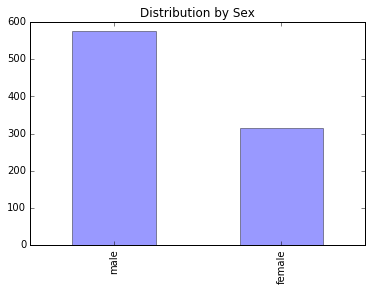

In [113]:
result['Sex'].value_counts().plot(kind = 'bar', alpha = 0.4, title = 'Distribution by Sex')

По этому графику видно, что мужчин было существенно больше чем женщин (почти в 2 раза)

То же самое стоит проделать и с классом пассажиров:

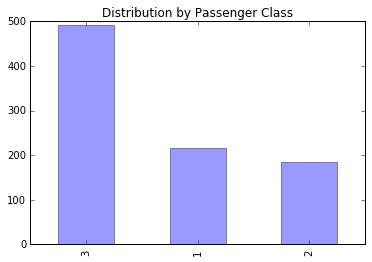

In [109]:
result['Pclass'].value_counts().plot(kind = 'bar', alpha = 0.4, title = 'Distribution by Passenger Class')

Теперь мы еще знаем, что больше людей были 3-го класса, а вот людей 1-го и 2-го было всего примерно по четверти.

Посмотрим на возраст пассажиров:

In [114]:
print("Minimum age = {0}".format(result['Age'].min()))
print("Maximum age = {0}".format(result['Age'].max()))

Minimum age = 0.42
Maximum age = 80.0


Можно сказать, что кого только не было на этом корабле - так что новых знаний это нам особо не принесло. (Разве что можно заподозрить, что 0.42 - это какой-то информационный вброс, но сочтём что там был полугодовалый ребёнок)

In [115]:
print("Mean age = {0}".format(result['Age'].mean()))

Mean age = 29.69911764705882


А вот средний возраст даёт нам понять, что молодых людей было всё-же больше, чем пожилых, что довольно неплохо.

**(3)** Так же можно подробнее изучить распределение возраста пассажиров, посмотрев на средние в разных классах:

In [130]:
result.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

По полученным числам довольно сильно прослеживается соответствие между средним возрастом и престижностью класса пассажиров. Средний возраст 1-го класса больше аж на 10 лет, чем 2-го, и почти на 15 - 3-го. (Что, вообще говоря, кажется мне и так довольно логичным фактом :) )

Ну и посчитаем процент выживших на корабле (а он оказался куда больше, чем я на самом деле ожидал)

In [118]:
print("Survived percent = {0}".format(result['Survived'].mean()))

Survived percent = 0.3838383838383838


В итоге, мы немало узнали об основных параметрах нашего датафрейма (и вероятно можем сделать предположение, что довольно немало людей на корабле были молодыми парнями из 
3-го класса)

**(2)** Попробуем теперь найти какие-нибудь признаки выживаемости.

Хочется предположить, что мужчины более вероятно должны были выживать, но на самом деле оказалось примерно так:

In [125]:
sex_dist = result['Sex'].value_counts()
survived_sex_dist = result[result.Survived == 1]['Sex'].value_counts()

print("Percent of Men survived: {0}".format(survived_sex_dist['male']/sex_dist['male']))
print("Percent of Women survived: {0}".format(survived_sex_dist['female']/sex_dist['female']))

Percent of Men survived: 0.18890814558058924
Percent of Women survived: 0.7420382165605095


(Вероятно стоило вспомнить, что в лодки первыми сажают женщин, стариков и детей, что, вероятно, и дало такой результат)

Сравним теперь средние возраста выживших и погибших (опять же хочется верить, что молодые более вероятно выживают)

In [127]:
print("Mean age of survived: {0}".format(result[result.Survived == 1]['Age'].mean()))
print("Mean age of lost: {0}".format(result[result.Survived == 0]['Age'].mean()))

Mean age of survived: 28.343689655172415
Mean age of lost: 30.62617924528302


Я бы сказал, что моё предположение, хоть и оказалось вроде верным, но, думаю, разница в 2 года у средних возрастов скорее несущественна, так что в итоге выживаемость, скорее всего, не сильно зависела от возраста.

Хочется так же проверить, нет ли зависимости между ценой билета и выживаемостью, так что проверим и средние цены

In [129]:
print("Mean price of survived: {0}".format(result[result.Survived == 1]['Fare'].mean()))
print("Mean price of lost: {0}".format(result[result.Survived == 0]['Fare'].mean()))

Mean price of survived: 48.39540760233918
Mean price of lost: 22.117886885245902


А вот в этот раз можно заметить существунную разницу между средними, значит в итоге можно предположить, что выжило куда больше богатых/знатных людей, чем тех, кто платил меньшую сумму за проезд.

**(4)** Перед более тщательным анализом данных стоит так же предобработать наши данные и избавиться как минимум от пропусков

Для начала найдём столбцы по которым вообще имеются пропуски:

In [133]:
list_nulls = result.isnull().any(axis = 0)
print("List of columns with NaN: {0}".format(result.columns[list_nulls].tolist()))

List of columns with NaN: ['Age', 'Cabin', 'Embarked']


Можно было бы просто убрать строки, в которых есть пропуски (можно и столбцы выкинуть)

In [137]:
dropped_results = result.dropna()
dropped_params = result.dropna(axis = 1)

print("Number of left rows: {0}".format(dropped_results.shape[0]))

Number of left rows: 183


Но второй вариант кажется совсем странным, а первый даже в нашем случае урезает количество пассажиров примерно в 4 раза. Так что, вероятно, это применимо только в случаях с крайне малым количеством пропусков.

Так что кажется более логичным попробовать заменить все пропуски по столбцам на что-то того же типа. А чтобы не создавать какие-то совсем выбросные значения (в духе 0 в графе возраста), я бы заменил на средние значения по столбцам. Правда это работает только на числах, а вот со строковым или булевским типом пришлось бы разбираться отдельно, в нашем случае, например, заменив *NaN* в строковых типах на пустую строку. (в надежде что последующим применяемым алгоритмам не сильно будут важны эти строковые значения) 

Сделать это мы можем примерно так:

In [139]:
filled_result = result.fillna({'Age': result['Age'].mean(), 'Cabin': '', 'Embarked': ''})
#filled_result

У этого метода есть вполне понятные минусы, так как он на самом деле несколько искажает реальную картину событий (ведь крайне маловероятно что у всех этих людей был один возраст, так еще и средний по всем), но его вполне можно было бы постепенно улучшать. Например заменяя *NaN* на случайное число с нормальным распределением в диапазоне $[min age, max age]$, или на среднеий возраст для своего класса пассажиров, т.к. мы знаем что он довольно разный (да и вообще можно использовать остальную информацию о пассажире, чтобы более вероятно определить его реальный возраст)

## Matplotlib

Подключим *matplotlib*.

In [141]:
import matplotlib.pyplot as plt

**(1)** Отобразим функцию $y(x)$, а затем её доверительный интервал с помощью *fill_between*:

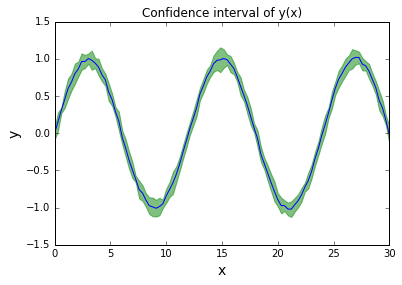

In [142]:
def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

x, y, error = gen_uncertain_data()

plt.plot(x, y)
plt.fill_between(x, y - error, y + error, color = 'green', alpha = 0.5)
plt.ylabel('y', fontsize = 14)
plt.xlabel('x', fontsize = 14)
plt.title('Confidence interval of y(x)')

plt.show()

**(2)** Вспомним что мы уже рассматривали распределение возраста в разных классах. Теперь возьмём те же самые распределения, но с заранее устранёнными пропусками (из-за которых в моём случае на графиках сильно видны выбросы в среднем возрасте :( ) и отобразим каждое на отдельном подграфике. Расположить это мне показалось нагляднее в один ряд с объединённой осью *y*. Ну и останется не забыть подписать оси и заголовок графика.

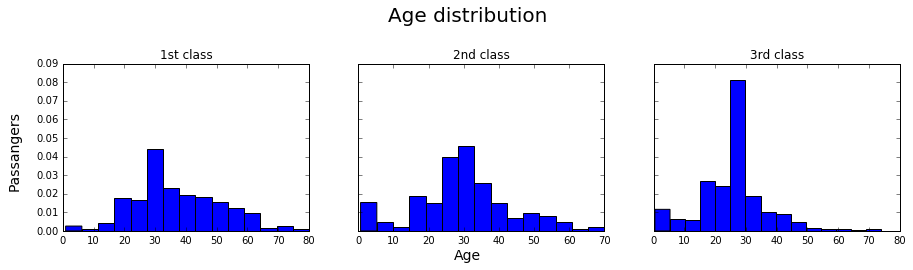

In [144]:
grouped_age = filled_result.groupby('Pclass')['Age']

figure, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15, 3))

ax1.hist(grouped_age.get_group(1), bins = 15, normed = 1)
ax1.set_title("1st class")

ax2.hist(grouped_age.get_group(2), bins = 15, normed = 1)
ax2.set_title("2nd class")

ax3.hist(grouped_age.get_group(3), bins = 15, normed = 1)
ax3.set_title("3rd class")

figure.text(0.5, 1.12, 'Age distribution', ha='center', va='center', fontsize = 20)
figure.text(0.5, 0.01, 'Age', ha='center', va='center', fontsize = 14)
figure.text(0.08, 0.5, 'Passangers', ha='center', va='center', rotation = 'vertical', fontsize = 14)
figure.subplots_adjust(wspace=0.2)

plt.show()